In [6]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city_df=pd.read_csv(city_data_to_load)
ride_df=pd.read_csv(ride_data_to_load)

city_df.head()

# Read the City and Ride Data
# Combine the data into a single dataset
# Display the data table for preview

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [7]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [8]:
combined_df=pd.merge(ride_df,city_df,on='city')
combine1 = combined_df.groupby('city')
combine2= combine1.first()
combine3 = combine2.reset_index()
combine3.head()
#The sample solution table returns the first value of each ride in each city. 

,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,2018-03-05 02:15:38,26.28,906850928986,12,Urban
1,Barajasview,2018-01-15 02:59:07,19.52,8268107272481,26,Urban
2,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
3,Bethanyland,2018-04-01 22:04:35,38.71,8221076873967,22,Suburban
4,Bradshawfurt,2018-03-06 21:44:53,19.74,6080367372860,7,Rural


## Bubble Plot of Ride Sharing Data

In [9]:
#create three series to be plotted on the chart 
urban_df=combined_df.loc[combined_df['type']=="Urban"]
urban_city_count=urban_df['city'].value_counts()
urban_mean=urban_df.groupby('city').mean()
urban_fare=urban_mean['fare']
x1=urban_city_count
y1=urban_fare
siz=urban_df.groupby('city')
size1=siz["driver_count"].mean()

In [10]:
rural_df=combined_df.loc[combined_df['type']=="Rural"]
rural_city_count=rural_df['city'].value_counts()
rural_mean=rural_df.groupby('city').mean()
rural_fare=rural_mean['fare']
x2=rural_city_count
y2=rural_fare
siz2=rural_df.groupby('city')
size2=siz2["driver_count"].mean()

In [11]:
suburban_df=combined_df.loc[combined_df['type']=="Suburban"]
suburban_city_count=suburban_df['city'].value_counts()
suburban_mean=suburban_df.groupby('city').mean()
suburban_fare=suburban_mean['fare']
x3=suburban_city_count
y3=suburban_fare
siz3=suburban_df.groupby('city')
size3=siz3["driver_count"].mean()

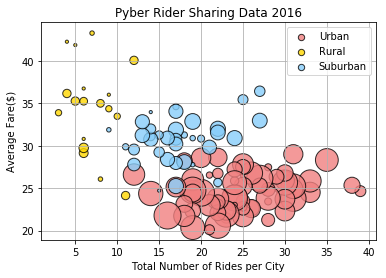

In [16]:
plt.scatter(x1,y1,c="lightcoral",s=10*size1,alpha=0.8,edgecolor="black")
plt.scatter(x2,y2,c="Gold",s=10*size2,alpha=0.8,edgecolor="black")
plt.scatter(x3,y3,c="lightskyblue",s=10*size3,alpha=0.8,edgecolor="black")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare($)")
plt.title("Pyber Rider Sharing Data 2016")
lgnd = plt.legend(labels=['Urban','Rural','Suburban'],)
plt.grid()
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]

## Total Fares by City Type

In [105]:
urban_fare=urban_df['fare'].sum()
rural_fare=rural_df['fare'].sum()
suburban_fare=suburban_df['fare'].sum()
fares=[urban_fare,rural_fare,suburban_fare]
labels=["Urban","Rural","Suburban"]
explode = (0.1, 0, 0)
colors=["lightcoral","gold","lightskyblue"]

Text(0.5,1,'% of Total Fares by city type')

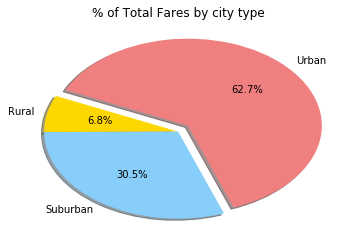

In [100]:
plt.pie(fares,colors=colors,labels=labels,explode=explode,shadow=True,
        startangle=290,autopct="%1.1f%%")
plt.title("% of Total Fares by city type")

## Total Rides by City Type

In [109]:
urban_ride=urban_df.count().mean()
rural_ride=rural_df.count().mean()
suburban_ride=suburban_df.count().mean()
rides=[urban_ride,rural_ride,suburban_ride]
labels=["Urban","Rural","Suburban"]
explode = (0.1, 0, 0)
colors=["lightcoral","gold","lightskyblue"]

Text(0.5,1,'% of Total Rides by city type')

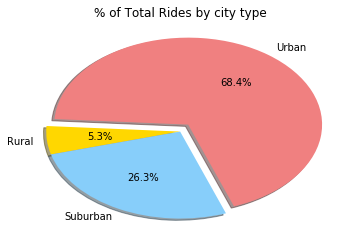

In [111]:
plt.pie(rides,colors=colors,labels=labels,explode=explode,shadow=True,
        startangle=290,autopct="%1.1f%%")
plt.title("% of Total Rides by city type")

## Total Drivers by City Type

In [138]:
urban_driver=city_df.loc[city_df['type']=="Urban"]['driver_count'].sum()
rural_driver=city_df.loc[city_df['type']=="Rural"]['driver_count'].sum()
suburban_driver=city_df.loc[city_df['type']=="Suburban"]['driver_count'].sum()
drivers=[urban_driver,rural_driver,suburban_driver]
labels=["Urban","Rural","Suburban"]
explode = (0.1, 0, 0)
colors=["lightcoral","gold","lightskyblue"]


Text(0.5,1,'% of Total Drivers by city type')

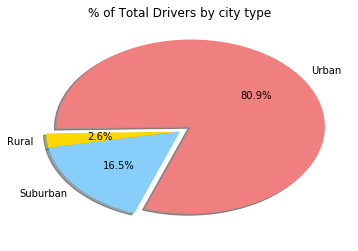

In [141]:
plt.pie(drivers,colors=colors,labels=labels,explode=explode,shadow=True,
        startangle=250,autopct="%1.1f%%")
plt.title("% of Total Drivers by city type")